In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_1.csv')

df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.replace({'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0})

df['SARS-Cov-2 exam result'].value_counts(normalize=True)

/tmp/ipykernel_6630/1781468887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0})


SARS-Cov-2 exam result
0    0.901134
1    0.098866
Name: proportion, dtype: float64

In [4]:
df_null_pct = df.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Mycoplasma pneumoniae                                    100.0
Prothrombin time (PT), Activity                          100.0
D-Dimer                                                  100.0
Urine - Sugar                                            100.0
Partial thromboplastin time (PTT)                        100.0
                                                         ...  
Patient age quantile                                       0.0
Patient addmited to regular ward (1=yes, 0=no)             0.0
SARS-Cov-2 exam result                                     0.0
Patient addmited to intensive care unit (1=yes, 0=no)      0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.0
Length: 111, dtype: float64

<Axes: ylabel='Frequency'>

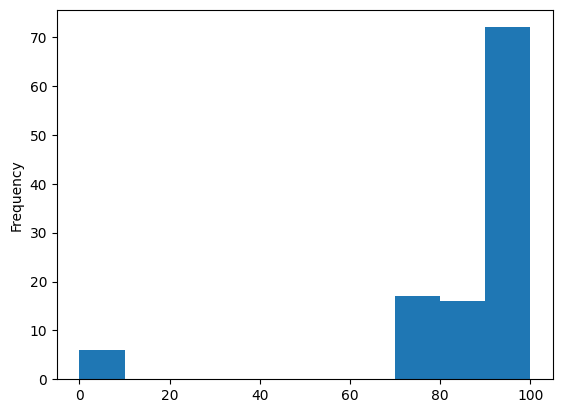

In [5]:
df_null_pct.plot(kind='hist')

In [6]:
nulls = df_null_pct[df_null_pct > 90]

df = df[[col for col in df.columns if col not in nulls]]

df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [7]:
features = [col for col in df.columns if col not in ['Patient ID', 
                                                    'Patient addmited to regular ward (1=yes, 0=no)',
                                                    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                    'Patient addmited to intensive care unit (1=yes, 0=no)',
                                                    'SARS-Cov-2 exam result']]

df[features].var()

Patient age quantile                                33.384166
Hematocrit                                           1.001661
Hemoglobin                                           1.001661
Platelets                                            1.001664
Mean platelet volume                                 1.001672
Red blood Cells                                      1.001664
Lymphocytes                                          1.001664
Mean corpuscular hemoglobin concentration (MCHC)     1.001664
Leukocytes                                           1.001664
Basophils                                            1.001664
Mean corpuscular hemoglobin (MCH)                    1.001664
Eosinophils                                          1.001664
Mean corpuscular volume (MCV)                        1.001664
Monocytes                                            1.001667
Red blood cell distribution width (RDW)              1.001664
Respiratory Syncytial Virus                          0.036957
Influenz

In [8]:
df.drop('Parainfluenza 2', axis=1, inplace=True)
features.remove('Parainfluenza 2')

In [9]:
df['has_disease'] = df[df.columns[20:]].sum(axis=1)

df.loc[df['has_disease'] > 1, 'has_disease'] = 1

df['has_disease'].value_counts(normalize=True)

has_disease
0.0    0.865344
1.0    0.134656
Name: proportion, dtype: float64

In [10]:
df[df['has_disease'] == 1]['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
0    0.981579
1    0.018421
Name: proportion, dtype: float64

In [11]:
df_clean = df.copy()

df[df.columns[20:]] = df[df.columns[20:]].fillna(0)

In [12]:
print('Total Columns: ', df_clean.shape[1])
df_clean.isna().sum(axis=1).value_counts()

Total Columns:  39


32    3596
16     917
30     458
2      263
14     166
18     139
0       99
3        4
29       1
27       1
Name: count, dtype: int64

In [13]:
df_red = df_clean[df_clean.isna().sum(axis=1) < 26]

df_red.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
9,5f1ed301375586c,17,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
13,0fbafd910aa8078,13,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [14]:
df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Influenza A, rapid test                                  77.20
Influenza B, rapid test                                  77.20
Mean platelet volume                                     62.28
Monocytes                                                62.15
Hematocrit                                               62.09
Mean corpuscular hemoglobin concentration (MCHC)         62.09
Lymphocytes                                              62.09
Basophils                                                62.09
Mean corpuscular hemoglobin (MCH)                        62.09
Eosinophils                                              62.09
Mean corpuscular volume (MCV)                            62.09
Red blood cell distribution width (RDW)                  62.09
Red blood Cells                                          62.09
Platelets                                                62.09
Hemoglobin                                               62.09
Leukocytes                                             

In [15]:
df_red = df_red[df_red['Leukocytes'].notna()]

df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Influenza A, rapid test                                  67.44
Influenza B, rapid test                                  67.44
Influenza A                                              39.20
Respiratory Syncytial Virus                              39.20
Influenza B                                              39.20
Coronavirus229E                                          39.20
CoronavirusOC43                                          39.20
Metapneumovirus                                          39.20
Inf A H1N1 2009                                          39.20
Chlamydophila pneumoniae                                 39.20
Parainfluenza 3                                          39.20
CoronavirusNL63                                          39.20
Parainfluenza 1                                          39.20
Adenovirus                                               39.20
Bordetella pertussis                                     39.20
Coronavirus HKU1                                       

In [16]:
df_red.loc[df_red['Mean platelet volume '].isna(), 'Mean platelet volume '] = df_red['Mean platelet volume '].mean()

df_red.loc[df_red['Monocytes'].isna(), 'Monocytes'] = df_red['Monocytes'].mean()

In [17]:
cols_to_remove = [c for c in df_red.columns[20:-1]]
df_feat = df_red.drop(cols_to_remove, axis=1)

#update features
features = [c for c in df_feat.columns if c not in ['Patient ID', 'SARS-Cov-2 exam result',
                                                   'Patient addmited to regular ward (1=yes, 0=no)',
                                                   'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                   'Patient addmited to intensive care unit (1=yes, 0=no)']]

df_feat.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,...,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0


In [18]:
df_feat.isna().sum().sum()

np.int64(0)

In [19]:
# print to dataset_1.csv
df_feat.drop('Patient ID', axis=1, inplace=True)
df_feat.to_csv('dataset_1.csv', index=False)